## 将样本特征和样本发生的概率联系起来，概率是一个数

# sigmoid函数

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def sigmoid(t):
    return 1 / (1+np.exp(-t))

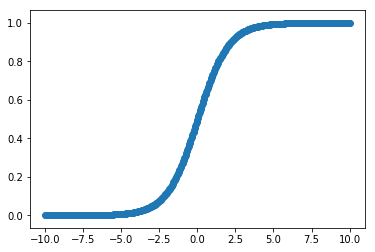

In [24]:
x = np.linspace(-10,10,500)
y=sigmoid(x)
plt.scatter(x,y)

# 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2, :2]
y = y[y<2]
X.shape

(100, 2)

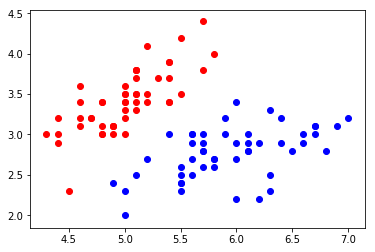

In [4]:
plt.scatter(X[y==0,0],X[y==0,1], color="red")
plt.scatter(X[y==1,0],X[y==1,1], color="blue")
plt.show()

## 使用逻辑回归

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [7]:
from JQXX.LogisticRegression import LogisticRegression

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test, y_test)

1.0

In [11]:
log_reg.predict_proba(X_test)

array([0.93292947, 0.98717455, 0.15541379, 0.18370292, 0.03909442,
       0.01972689, 0.05214631, 0.99683149, 0.98092348, 0.75469962,
       0.0473811 , 0.00362352, 0.27122595, 0.03909442, 0.84902103,
       0.80627393, 0.83574223, 0.33477608, 0.06921637, 0.21582553,
       0.0240109 , 0.1836441 , 0.98092348, 0.98947619, 0.08342411])

In [12]:
log_reg.coef_

array([ 3.01749692, -5.03046934])

In [13]:
log_reg.intercept_

-0.682738369899311

In [16]:
def X2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [17]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = X2(x1_plot)

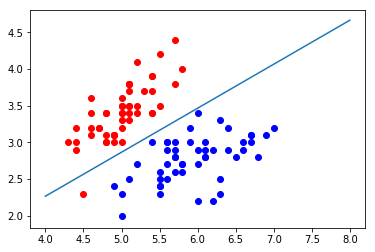

In [19]:
plt.scatter(X[y==0,0],X[y==0,1], color="red")
plt.scatter(X[y==1,0],X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

In [25]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]*100)).reshape(-1,1))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pre = model.predict(X_new)
    zz = y_pre.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

SyntaxError: invalid syntax (<ipython-input-25-c13368346cd1>, line 6)

In [39]:
def plot_decision_boundary(model, axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pre = model.predict(X_new)
    zz = y_pre.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

C:\Users\14663\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


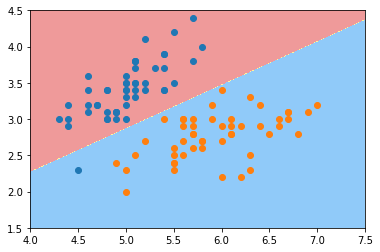

In [40]:
plot_decision_boundary(log_reg,axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1])  
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

## Knn的决策边界

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
knn_clf.score(X_test, y_test)

1.0

C:\Users\14663\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


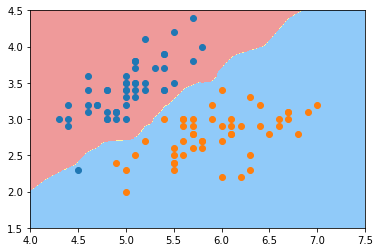

In [43]:
plot_decision_boundary(knn_clf,axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0],X[y==0,1])  
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [44]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

C:\Users\14663\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


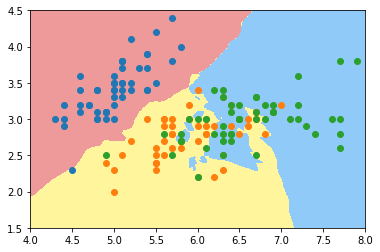

In [46]:
plot_decision_boundary(knn_clf_all,axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])  
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()

C:\Users\14663\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


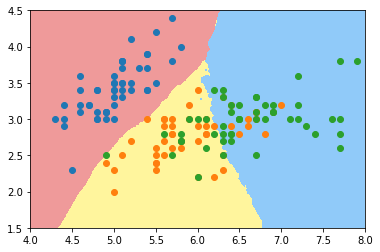

In [47]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)
plot_decision_boundary(knn_clf_all,axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1])  
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1])
plt.show()

# 逻辑回归中添加多项式回归

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1]**2 <1.5, dtype='int')

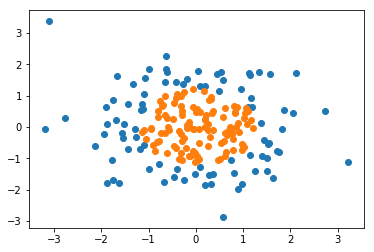

In [51]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

## 使用逻辑回归

In [97]:
from JQXX.LogisticRegression import LogisticRegression

In [98]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [99]:
log_reg.score(X,y)

0.605

In [102]:
def plot_decision_boundary(model, axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pre = model.predict(X_new)
    zz = y_pre.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

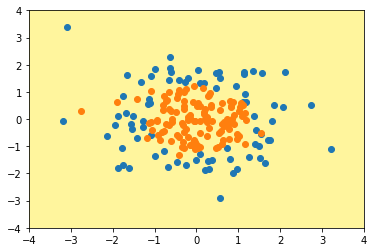

In [103]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomiaLogisticRegression(degree):
    
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LogisticRegression()) #线性回归
    ])

In [96]:
poly_log_reg = PolynomiaLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression())])

In [17]:
poly_log_reg.score(X,y)

0.95

C:\Users\14663\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


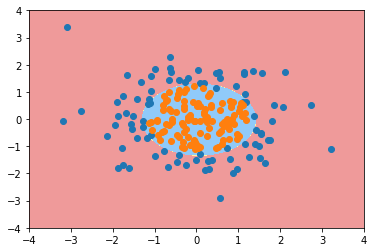

In [16]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

C:\Users\14663\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


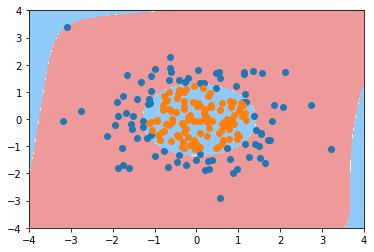

In [18]:
poly_log_reg = PolynomiaLogisticRegression(degree=20)
poly_log_reg.fit(X,y)
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### scikit-learn中的逻辑回归

In [105]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666) 
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1]**2 <1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

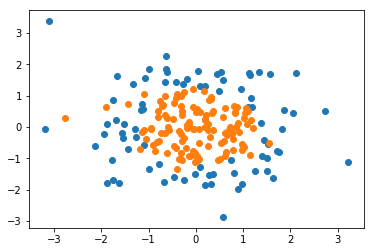

In [106]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=666)

In [108]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
log_reg.score(X_train, y_train)

0.5666666666666667

In [110]:
log_reg.score(X_test, y_test)

0.72

In [11]:
def plot_decision_boundary(model, axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pre = model.predict(X_new)
    zz = y_pre.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

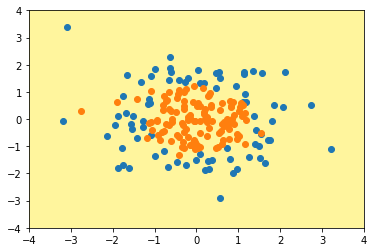

In [112]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomiaLogisticRegression(degree):
    
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LogisticRegression()) #线性回归
    ])

In [114]:
poly_log_reg = PolynomiaLogisticRegression(degree=2)
poly_log_reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [115]:
poly_log_reg.score(X_train,y_train)

0.9

In [116]:
poly_log_reg.score(X_test,y_test)

0.9

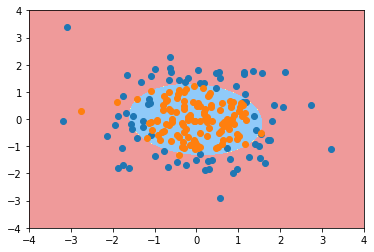

In [117]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

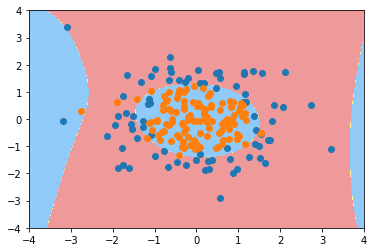

In [118]:
poly_log_reg = PolynomiaLogisticRegression(degree=20)
poly_log_reg.fit(X_train,y_train)
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [121]:
poly_log_reg.score(X_train,y_train)

0.9066666666666666

## 用上参数C

In [123]:
def PolynomiaLogisticRegression(degree,C):
    
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LogisticRegression(C=C)) #线性回归
    ])

In [124]:
poly_log_reg3 = PolynomiaLogisticRegression(degree=20,C=0.1)
poly_log_reg3.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [125]:
poly_log_reg3.score(X_train,y_train)

0.86

In [126]:
poly_log_reg3.score(X_test,y_test)

0.9

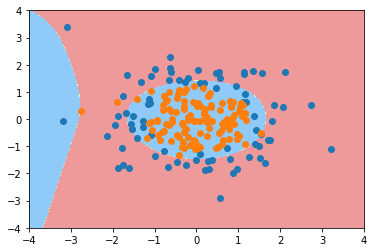

In [127]:
plot_decision_boundary(poly_log_reg3, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### 使用L1正则

In [4]:
def PolynomiaLogisticRegression(degree,C,penalty="l2"):
    
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),#特征变化
    ("std_scaler",StandardScaler()), #归一化
    ("lin_reg",LogisticRegression(C=C,penalty=penalty)) #线性回归
    ])

In [133]:
poly_log_reg4 = PolynomiaLogisticRegression(degree=20,C=0.1,penalty='l1')
poly_log_reg4.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [134]:
poly_log_reg4.score(X_train,y_train)

0.8733333333333333

In [135]:
poly_log_reg4.score(X_test,y_test)

0.88

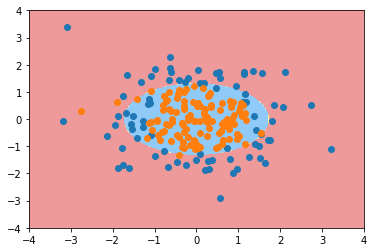

In [136]:
plot_decision_boundary(poly_log_reg4, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# OVR和OVO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
log_reg.score(X_test,y_test)

0.6578947368421053

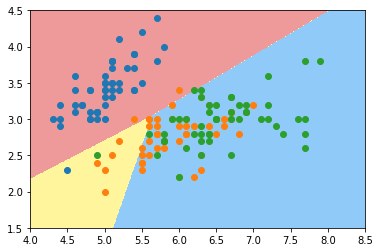

In [143]:
plot_decision_boundary(log_reg, axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [7]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver="newton-cg")

In [8]:
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

0.7894736842105263

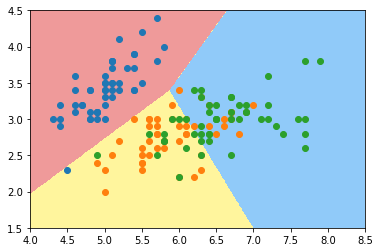

In [12]:
plot_decision_boundary(log_reg2, axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

## 使用所有数据

In [13]:
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9473684210526315

In [15]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver="newton-cg")
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

1.0

## OVO AND OCR:对所有的二分类完成多分类

In [17]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9473684210526315

In [19]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0